# MARKET SEGMENTATION 
## Case Study: Fast Food 

#### Importing Dependencies & Data

In [580]:
# R command: library("MSA")
import pandas as pd

In [581]:
pd.options.display.max_columns = None

In [582]:
# R command: data("mcdonalds", package = "MSA")
df = pd.read_csv("mcdonalds.csv")

### EDA

In [583]:
# R> names(mcdonalds)
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [584]:
# R> dim(mcdonalds)
df.shape

(1453, 15)

In [585]:
#R> head(mcdonalds, 3)
df[:3]  #you can also use df.head()[:3]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [586]:
MD_x = df.iloc[:,:11]

In [587]:
# R> MD.x <- (MD.x == "Yes") + 0
# This code coverts Yes/No to os and 1s

columns_needed = df.columns[:11]
MD_x[columns_needed]= (MD_x[columns_needed] == "Yes").astype(int)
MD_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [588]:
MD_x[:5]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [589]:
#import numpy since we ar enow dealing with arrays
import numpy as np

In [590]:
# R> round(colMeans(MD.x), 2)
# this code is creating a new object that stores mean values of all the columns in MD_x
column_means = MD_x.mean(axis=0).round(2)

In [591]:
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [592]:
# R> MD.pca <- prcomp(MD.x)
# R> summary(MD.pca)
# These code snippets are performing Principal Component Analysis, and to do so in Python, we have a library

from sklearn.decomposition import PCA

In [593]:
# Perform PCA
pca = PCA()
MD_PCA = pca.fit_transform(MD_x)

# Calculate the standard deviation of each principal component
std_deviation = np.sqrt(pca.explained_variance_)

# Get the explained variance ratio (similar to the proportion of variance explained)
proportion_of_var = pca.explained_variance_ratio_

# Create a summary DataFrame (equivalent to summary in R)
summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(proportion_of_var))],
    'Standard Deviation': std_deviation.round(2),
    'Proportion of Variance': proportion_of_var,
    'Cumulative Variance': np.cumsum(proportion_of_var)
})

# Round the results for better readability
summary = summary.round(2)

In [594]:
summary

,Principal Component,Standard Deviation,Proportion of Variance,Cumulative Variance
0,PC1,0.76,0.30,0.30
1,PC2,0.61,0.19,0.49
2,PC3,0.50,0.13,0.63
3,PC4,0.40,0.08,0.71
4,PC5,0.34,0.06,0.77
5,PC6,0.31,0.05,0.82
6,PC7,0.29,0.04,0.86
7,PC8,0.28,0.04,0.90
8,PC9,0.27,0.04,0.94
9,PC10,0.25,0.03,0.97


In [595]:
summary = summary.set_index('Principal Component').T
summary

Principal Component,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.76,0.61,0.50,0.40,0.34,0.31,0.29,0.28,0.27,0.25,0.24
Proportion of Variance,0.30,0.19,0.13,0.08,0.06,0.05,0.04,0.04,0.04,0.03,0.03
Cumulative Variance,0.30,0.49,0.63,0.71,0.77,0.82,0.86,0.90,0.94,0.97,1.00


In [596]:
# R> print(MD.pca, digits = 1)

# Get the principal components (components)
components = pca.components_
feature_names = df.columns[:11]

# Get the standard deviations (sqrt of the explained variance)
std_deviation = np.sqrt(pca.explained_variance_)

# Round the results to 1 decimal place
components_rounded = np.round(components, 3)
std_deviation_rounded = np.round(std_deviation, 1)

# Create a DataFrame for the principal components
components_df = pd.DataFrame(components_rounded, columns=[f'PC{i+1}' for i in range(components_rounded.shape[1])], index = feature_names)

# Create a DataFrame for the standard deviations
std_deviation_df = pd.DataFrame({'Standard Deviation': std_deviation_rounded}, index=[f'PC{i+1}' for i in range(len(std_deviation_rounded))])

# Print the results
print("Principal Components (rounded to 1 decimal place):")
print(components_df)

print("\nStandard Deviations (rounded to 1 decimal place):")
print(std_deviation_df)

Principal Components (rounded to 1 decimal place):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477  0.155  0.006 -0.116 -0.304  0.108  0.337  0.472 -0.329   
convenient -0.364 -0.016 -0.019  0.034  0.064  0.087  0.611 -0.307 -0.601   
spicy       0.304  0.063  0.037  0.322  0.802  0.065  0.149  0.287 -0.024   
fattening   0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068   
greasy      0.308 -0.278 -0.071  0.073 -0.361 -0.108  0.129  0.211  0.003   
fast       -0.171  0.348  0.355  0.407 -0.209  0.595  0.103  0.077  0.261   
cheap      -0.281 -0.060  0.708 -0.386  0.036 -0.087 -0.040  0.360 -0.068   
tasty      -0.013  0.113 -0.376 -0.590  0.138  0.628 -0.140  0.073 -0.030   
expensive  -0.572  0.018 -0.400  0.161  0.003 -0.166 -0.076  0.639 -0.067   
healthy     0.110  0.666  0.076  0.005 -0.009 -0.240 -0.428 -0.079 -0.454   
disgusting -0.045  0.542 -0.142 -0.251 -0.002 -0.339  0.489 -0.020  0.490   

             PC10   PC11

In [597]:
import matplotlib.pyplot as plt

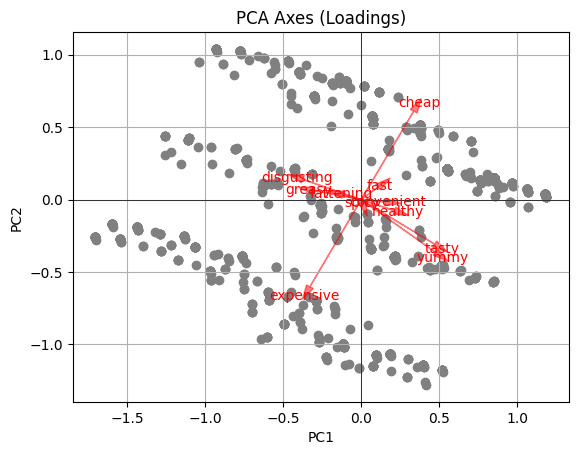

In [598]:
#R> library("flexclust")
#R> plot(predict(MD.pca), col = "grey")
#R> projAxes(MD.pca)

fig, ax = plt.subplots()

# Project the original data onto the principal components
projected_data = pca.transform(MD_x)
ax.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.title('PCA Projection')

# Plot the first two principal component axes (as arrows)
for i in range(len(df.columns[:11])):  # Assuming the first 11 columns were used for PCA
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.5, head_width=0.05, head_length=0.1)
# Add labels for the features
for i, feature in enumerate(df.columns[:11]):
    ax.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, feature,
             color='red', ha='center', va='center')

ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PCA Axes (Loadings)')
plt.grid(True)
plt.show()

### Extracting Segments

In [600]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

Best number of clusters: 8
Best average silhouette score: 0.2764856855667739


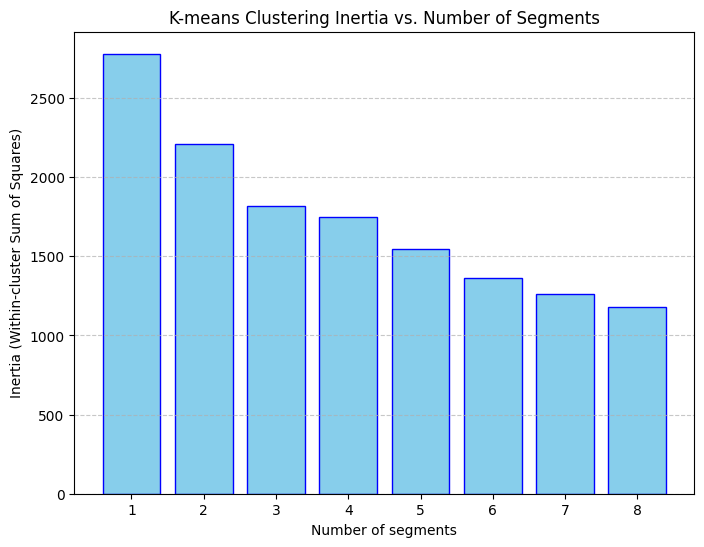

In [601]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

# Set random seed for reproducibility
np.random.seed(1234)

# Define the range of clusters to evaluate (1 to 9 segments)
cluster_range = range(1, 9)
best_kmeans = None
best_silhouette_score = -1
best_k = None
nrep = 10  # Number of repetitions

# Store the inertia values (within-cluster sum of squares) for each k value
inertia = []

# Store the results for each k value
kmeans_results = {}

# Perform KMeans clustering for each number of clusters in the specified range
for k in cluster_range:
    silhouette_scores = []  # To store silhouette scores for each repetition

    for i in range(nrep):
        kmeans = KMeans(n_clusters=k, random_state=random.randint(1, 10000))
        kmeans.fit(MD_x)

        # Evaluate the clustering quality using silhouette score
        # Skip silhouette score for k = 1 (not defined)
        if k > 1:
            silhouette_scores.append(silhouette_score(MD_x, kmeans.labels_))

    # Get the average silhouette score for the current k if k > 1
    avg_silhouette_score = np.mean(silhouette_scores) if silhouette_scores else None

    # Store the KMeans results and silhouette score for later analysis
    kmeans_results[k] = {
        "kmeans": kmeans,
        "avg_silhouette_score": avg_silhouette_score
    }

    # Keep track of the best model (highest silhouette score)
    if avg_silhouette_score and avg_silhouette_score > best_silhouette_score:
        best_silhouette_score = avg_silhouette_score
        best_kmeans = kmeans
        best_k = k

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Re-label the clusters (just like relabel() in R)
# Find the cluster with the most data points and assign it as the "base" label
labels = best_kmeans.labels_ if best_kmeans else []
new_labels = np.zeros_like(labels)

for cluster in np.unique(labels):
    # Get the majority label in each cluster
    cluster_points = np.where(labels == cluster)[0]
    new_labels[cluster_points] = cluster

# Store the final re-labeled cluster results
if best_kmeans:
    best_kmeans.labels_ = new_labels

# Output: best model and its silhouette score
if best_kmeans:
    print(f"Best number of clusters: {best_k}")
    print(f"Best average silhouette score: {best_silhouette_score}")
else:
    print("K-means clustering could not be performed.")

# Plot the inertia as a bar chart (equivalent to plot(MD.km28) in R)
plt.figure(figsize=(8, 6))
plt.bar(cluster_range, inertia, color='skyblue', edgecolor='blue')
plt.xlabel("Number of segments")  # X-axis label
plt.ylabel("Inertia (Within-cluster Sum of Squares)")  # Y-axis label
plt.title("K-means Clustering Inertia vs. Number of Segments")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Gridlines only on y-axis
plt.show()


In [602]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = MD_PCA, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.550242,-0.275031,0.013737,0.200604,0.145063,-0.306575,-0.075308,-0.345552,0.136589,0.432798,0.456076
1449,0.957339,-0.014308,-0.303843,0.444350,0.133690,-0.381804,-0.326432,-0.878047,0.304441,0.247443,0.193671
1450,0.185894,-1.062662,-0.220857,-0.467643,0.187757,0.192703,-0.091597,0.036576,-0.038255,-0.056518,0.012800
1451,1.182064,0.038570,-0.561561,0.701126,-0.047645,-0.193687,-0.027335,0.339374,-0.022267,0.002573,0.105316


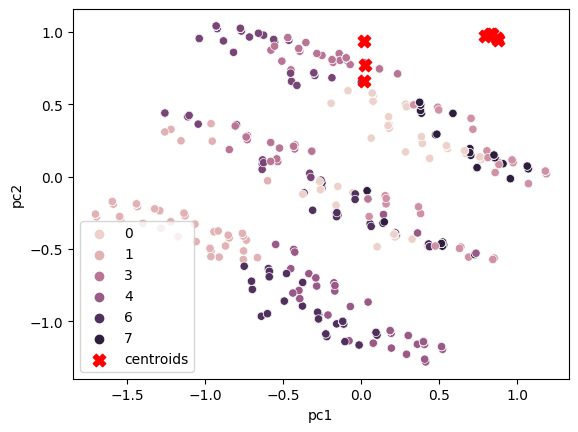

In [603]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
#fig, ax = plt.subplots()
#ax.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [604]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import random
from sklearn.preprocessing import StandardScaler

In [605]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13140\1324457875.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ari_results[k] for k in cluster_range], labels=cluster_range)


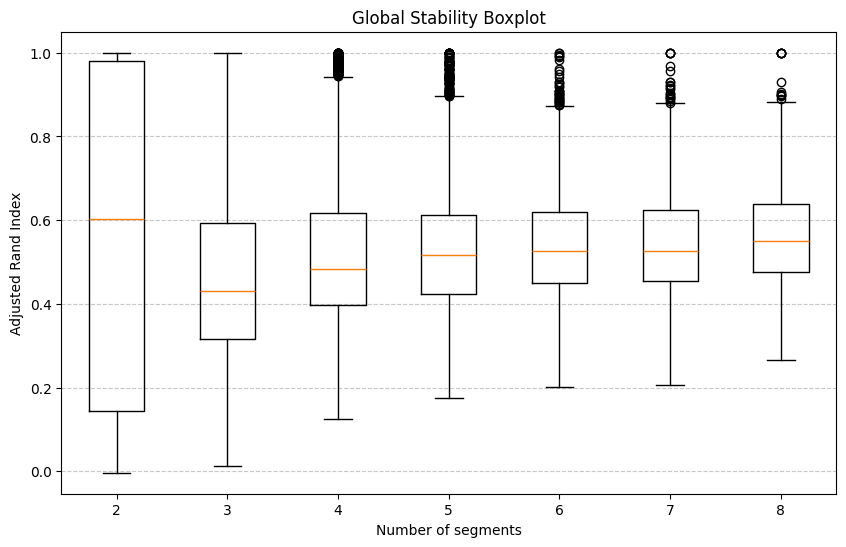

In [606]:
#import numpy as np
#from sklearn.cluster import KMeans
#from sklearn.metrics import adjusted_rand_score
#import matplotlib.pyplot as plt
#import random

# Data and parameters
np.random.seed(1234)
cluster_range = range(2, 9)
nrep = 10  # Number of repetitions
nboot = 100  # Number of bootstrap samples

# Store ARI results
ari_results = {k: [] for k in cluster_range}

# Perform bootstrapped KMeans clustering for each k
for k in cluster_range:
    for _ in range(nboot):
        # Resample the data (bootstrap sampling)
        bootstrap_indices = np.random.choice(MD_x.shape[0], size=MD_x.shape[0], replace=True)
        bootstrap_sample = MD_x.iloc[bootstrap_indices]

        # Store ARI scores for repeated KMeans runs
        cluster_labels_list = []
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, random_state=random.randint(1, 1000))
            kmeans.fit(bootstrap_sample)
            cluster_labels_list.append(kmeans.labels_)

        # Calculate ARI for each pair of clusterings
        for i in range(len(cluster_labels_list)):
            for j in range(i + 1, len(cluster_labels_list)):
                ari = adjusted_rand_score(cluster_labels_list[i], cluster_labels_list[j])
                ari_results[k].append(ari)

# Create a boxplot for the ARI scores
plt.figure(figsize=(10, 6))
plt.boxplot([ari_results[k] for k in cluster_range], labels=cluster_range)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [607]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
#R> histogram(MD.km28[["4"]], data = MD.x, xlim = 0:1)

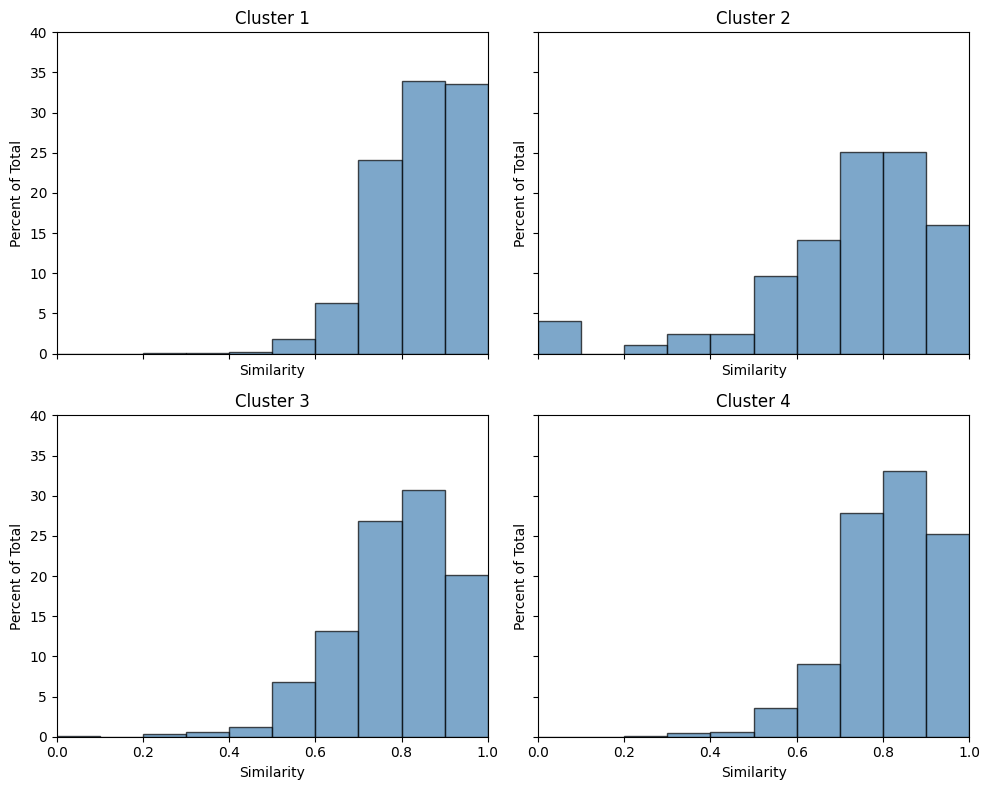

In [608]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

# Initialize an empty dictionary to store similarity scores for each cluster
cluster_similarities = {i: [] for i in range(4)}

# Compute pairwise cosine similarity for each cluster
for cluster in range(4):
    cluster_data = MD_x[cluster_labels == cluster]  # Subset data for this cluster
    if len(cluster_data) > 1:
        similarity_matrix = cosine_similarity(cluster_data)
        # Flatten upper triangle of the similarity matrix (excluding diagonal)
        similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
        cluster_similarities[cluster].extend(similarities)

# Plot gorge plot with normalized y-axis in percentage
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    # Calculate histogram counts and normalize to percentage
    counts, bins = np.histogram(
        cluster_similarities[i],
        bins=10,
        range=(0, 1)
    )
    percentages = (counts / counts.sum()) * 100  # Convert counts to percentages

    # Plot the histogram as a bar plot
    ax.bar(
        bins[:-1], 
        percentages, 
        width=np.diff(bins), 
        align="edge", 
        color="steelblue", 
        edgecolor="black", 
        alpha=0.7
    )
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 40)  # Set y-axis range from 0 to 100%
    ax.set_title(f"Cluster {i+1}")
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Percent of Total")
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13140\3510445909.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


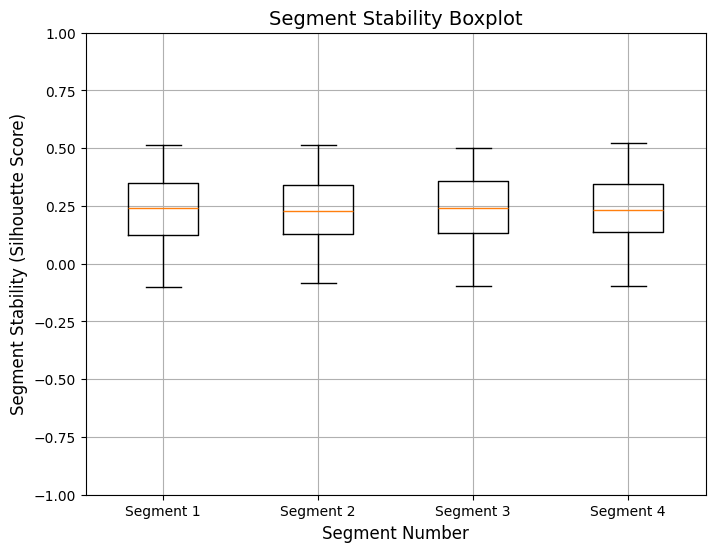

In [609]:
# Parameters
k = 4  # Number of clusters
nboot = 100  # Number of bootstraps

# Perform initial clustering
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
cluster_labels = kmeans.labels_

# Collect silhouette scores for each cluster
silhouette_scores = silhouette_samples(MD_x, cluster_labels)

# Bootstrap for stability analysis
segment_stability = {i: [] for i in range(k)}

for _ in range(nboot):
    # Resample the data
    MD_x_resampled = resample(MD_x, random_state=np.random.randint(1000))
    
    # Fit KMeans on the resampled data
    kmeans_resampled = KMeans(n_clusters=k, random_state=np.random.randint(1000))
    kmeans_resampled.fit(MD_x_resampled)
    
    # Compute silhouette scores for each segment
    silhouette_resampled = silhouette_samples(MD_x_resampled, kmeans_resampled.labels_)
    
    # Group silhouette scores by segment
    for segment in range(k):
        segment_scores = silhouette_resampled[kmeans_resampled.labels_ == segment]
        segment_stability[segment].extend(segment_scores)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.boxplot(
    [segment_stability[i] for i in range(k)],labels=[f"Segment {i+1}" for i in range(k)],
    showfliers=False
)
plt.ylim(-1, 1)  # Match the R logic for y-axis limits
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Segment Stability (Silhouette Score)", fontsize=12)
plt.title("Segment Stability Boxplot", fontsize=14)
plt.grid(True)
plt.show()

In [679]:
df['cluster_num'] = kmeans.labels_ 
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,3


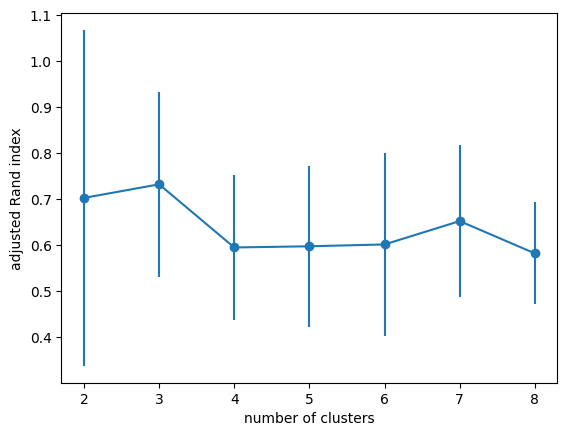

In [610]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(MD_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(MD_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [611]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.datasets import make_classification

In [617]:
import numpy as np

# Define the log-likelihood function for binary distributions
def binary_log_likelihood(data, probs):
    probs = np.clip(probs, 1e-10, 1 - 1e-10)  # Clip probabilities to avoid log(0)
    return np.sum(data * np.log(probs) + (1 - data) * np.log(1 - probs), axis=1)

# Fit a custom binary mixture model
def fit_binary_mixture(data, k, nrep=10):
    best_log_likelihood = -np.inf
    best_model = None
    
    for _ in range(nrep):
        # Random initialization of probabilities
        probs = np.random.rand(k, data.shape[1])
        probs = np.clip(probs, 1e-10, 1 - 1e-10)  # Clip to avoid extreme values
        weights = np.ones(k) / k  # Equal weights initially
        log_likelihood = -np.inf

        for iteration in range(100):  # Max iterations
            # Expectation step
            responsibilities = np.array([
                weights[j] * np.exp(binary_log_likelihood(data, probs[j]))
                for j in range(k)
            ]).T
            
            # Normalize responsibilities
            responsibilities /= responsibilities.sum(axis=1, keepdims=True)
            
            # Maximization step
            weights = responsibilities.mean(axis=0)
            probs = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, None]
            
            # Clip probabilities to avoid issues in the log-likelihood calculation
            probs = np.clip(probs, 1e-10, 1 - 1e-10)
            
            # Calculate log-likelihood
            new_log_likelihood = np.sum([
                np.sum(responsibilities[:, j] * binary_log_likelihood(data, probs[j]))
                for j in range(k)
            ])
            
            # Check for convergence
            if np.abs(new_log_likelihood - log_likelihood) < 1e-6:
                break
            log_likelihood = new_log_likelihood
        
        # Track the best model
        if log_likelihood > best_log_likelihood:
            best_log_likelihood = log_likelihood
            best_model = (weights, probs, responsibilities, log_likelihood)
    
    if best_model is None:
        print("Warning: No valid model was found.")
    
    return best_model, best_log_likelihood

# Apply the binary mixture model to your dataset
cluster_range = range(2, 9)
results = {}

for k in cluster_range:
    model, log_likelihood = fit_binary_mixture(MD_x_binary, k)
    if model is not None:
        weights, probs, responsibilities, _ = model

        # AIC and BIC calculations
        aic = -2 * log_likelihood + 2 * (k * MD_x_binary.shape[1] + k - 1)
        bic = -2 * log_likelihood + np.log(MD_x_binary.shape[0]) * (k * MD_x_binary.shape[1] + k - 1)
        
        # Entropy penalty for ICL
        entropy_penalty = -np.sum(responsibilities * np.log(responsibilities + 1e-10))
        icl = bic + entropy_penalty  # ICL calculation
        
        # Store metrics and model
        results[k] = {
            "logLik": log_likelihood,
            "AIC": aic,
            "BIC": bic,
            "ICL": icl,
            "Model": {
                "weights": weights,
                "probs": probs,
                "responsibilities": responsibilities,
                "log_likelihood": log_likelihood
            }
        }

# Print the results
for k, metrics in results.items():
    print(f"k={k}: logLik={metrics['logLik']:.4f}, AIC={metrics['AIC']:.4f}, BIC={metrics['BIC']:.4f}, ICL={metrics['ICL']:.4f}")


k=2: logLik=-6812.7726, AIC=13671.5453, BIC=13793.0171, ICL=13949.4723
k=3: logLik=-5973.9343, AIC=12017.8687, BIC=12202.7172, ICL=12415.8456
k=4: logLik=-5454.7864, AIC=11003.5728, BIC=11251.7979, ICL=11520.9691
k=5: logLik=-5111.3793, AIC=10340.7586, BIC=10652.3604, ICL=11058.8226
k=6: logLik=-4861.6789, AIC=9865.3577, BIC=10240.3361, ICL=10665.0782
k=7: logLik=-4683.4515, AIC=9532.9030, BIC=9971.2580, ICL=10446.7667
k=8: logLik=-4547.2196, AIC=9284.4392, BIC=9786.1708, ICL=10304.4483


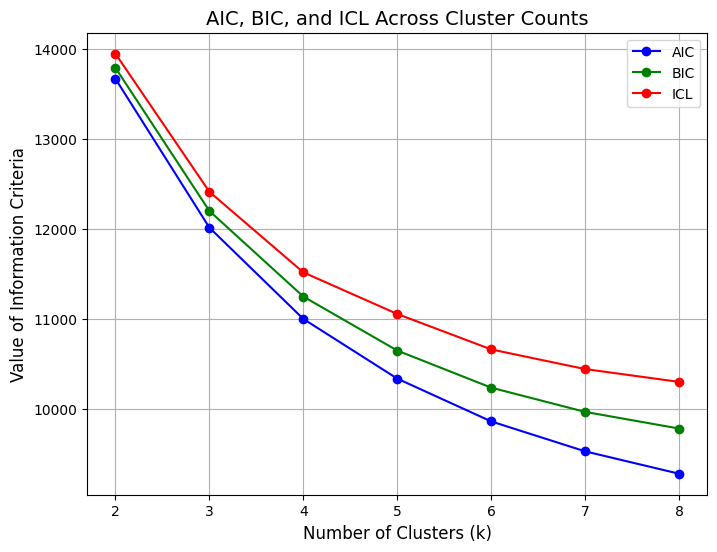

In [619]:
import matplotlib.pyplot as plt

# Extract values for plotting
num_clusters = list(results.keys())
aic_values = [results[k]["AIC"] for k in num_clusters]
bic_values = [results[k]["BIC"] for k in num_clusters]
icl_values = [results[k]["ICL"] for k in num_clusters]

# Plot the criteria
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, aic_values, marker='o', label='AIC', color='blue')
plt.plot(num_clusters, bic_values, marker='o', label='BIC', color='green')
plt.plot(num_clusters, icl_values, marker='o', label='ICL', color='red')

# Add labels, title, and legend
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Value of Information Criteria", fontsize=12)
plt.title("AIC, BIC, and ICL Across Cluster Counts", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [621]:
from sklearn.metrics import confusion_matrix

# Assuming MD_x_binary contains the data, and results is the dictionary from the previous step
# Get the 4-cluster K-means solution
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans_model.fit_predict(MD_x_binary)

# Get the 4-component mixture model solution
chosen_k = 4
mixture_model = results[chosen_k]["Model"]
responsibilities = np.array([
    mixture_model["weights"][j] * np.exp(binary_log_likelihood(MD_x_binary, mixture_model["probs"][j]))
    for j in range(chosen_k)
]).T
mixture_clusters = responsibilities.argmax(axis=1)

# Create cross-tabulation
cross_tab = pd.crosstab(
    pd.Series(kmeans_clusters, name="KMeans Clusters"),
    pd.Series(mixture_clusters, name="Mixture Model Clusters")
)

# Display the cross-tabulation
print("Cross-Tabulation Between K-Means and Mixture Model Clusters:")
print(cross_tab)

Cross-Tabulation Between K-Means and Mixture Model Clusters:
Mixture Model Clusters    0    1    2    3
KMeans Clusters                           
0                       557    0   23    0
1                         0    0   32  196
2                        34  279    2    7
3                         1    0  322    0


#### Using Mixtures of Regression Models

In [624]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [625]:
df['Like'] = df['Like'].str.extract(r'([+-]?\d+)').astype(int)
df['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [626]:
like_counts = df['Like'].value_counts().sort_index()
like_counts

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like, dtype: int64

In [697]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)

3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


In [705]:
df["Like"].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [628]:
MACD = df

In [629]:
columns_needed = df.columns[:11]
#MACD[columns_needed] = MACD[columns_needed].applymap(lambda x: 1 if x == 'yes' else 0)
MACD[columns_needed]= (MACD[columns_needed] == "Yes").astype(int)
MACD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


In [630]:
MACD = MACD.drop(['Age','VisitFrequency','Gender'], axis = 1)
MACD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,0,1,0,1,0,1,1,0,1,0,0,-3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4
4,0,1,0,1,1,1,1,0,0,1,0,2


In [631]:
columns_needed = df.columns[:11]

# Step 2: Convert 'yes' to 1 and 'no' to 0
df_selected = df[columns_needed].applymap(lambda x: 1 if x == 'yes' else 0)

# Step 3: Store the transformed dataframe in a new variable
df_new = df_selected.copy()

# Check the transformed dataframe
print(df_new)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           0      0          0       0     0      0      0   
1         0           0      0          0       0     0      0      0   
2         0           0      0          0       0     0      0      0   
3         0           0      0          0       0     0      0      0   
4         0           0      0          0       0     0      0      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           0      0          0       0     0      0      0   
1449      0           0      0          0       0     0      0      0   
1450      0           0      0          0       0     0      0      0   
1451      0           0      0          0       0     0      0      0   
1452      0           0      0          0       0     0      0      0   

      expensive  healthy  disgusting  
0             0        0           0  
1             0        0           0  
2     

In [632]:
MCD_x = df_new
MCD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,0,0,0,0,0,0,0,0,0,0
1449,0,0,0,0,0,0,0,0,0,0,0
1450,0,0,0,0,0,0,0,0,0,0,0
1451,0,0,0,0,0,0,0,0,0,0,0


#### Using Mixtures of Regression Models

In [633]:
"""
R> f <- paste(names(mcdonalds)[1:11], collapse = "+")
R> f <- paste("Like.n ~ ", f, collapse = "")
R> f <- as.formula(f)
R> f
"""

# Step 1: Create a formula for the regression model
f = "+".join(MACD.columns[1:12])  # Join independent variables
formula = f"Like ~ {'yummy'}+ {'convenient'}, {'spicy'}, {'fattening'}, {'greasy'},{'fast'}, {'cheap'}, {'tasty'}, {'expensive'}, {'healthy'}, {'disgusting'}"  # Create the formula string
print(formula)

Like ~ yummy+ convenient, spicy, fattening, greasy,fast, cheap, tasty, expensive, healthy, disgusting


In [634]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

MACD['Like'] = 6 - pd.to_numeric(df['Like'], errors='coerce')

# Prepare independent variables (these should be in the columns 'yummy', 'convenient', ..., etc.)
# In this case, I'm assuming the independent variables are named like 'yummy', 'convenient', etc.
X = MACD[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']].copy()

# Dependent variable: 'Like.n'
y = MACD['Like']

# Step 2: Standardizing the features (important for mixture models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit a Gaussian Mixture Model to simulate the mixture of regressions
# We will use 2 components (as in the R code)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X_scaled)

# Step 4: Assign clusters to each observation
clusters = gmm.predict(X_scaled)

# Step 5: Fit Linear Regression Models for each Cluster

# Create a container for the models
regression_models = {}

# Loop over each cluster (0 and 1) and fit a linear regression
for cluster in np.unique(clusters):
    # Filter data for the current cluster
    X_cluster = X_scaled[clusters == cluster]
    y_cluster = y[clusters == cluster]
    
    # Fit linear regression for the current cluster
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    
    # Save the model and coefficients
    regression_models[cluster] = model

# Step 6: Output the regression coefficients and assess the significance

# We will use statsmodels to assess the significance of the regression coefficients
# Create a statsmodels model for the first cluster (you can repeat for each cluster)
X_with_intercept = sm.add_constant(X_scaled)  # Add intercept

# For cluster 0 (for example):
X_cluster_0 = X_with_intercept[clusters == 0]
y_cluster_0 = y[clusters == 0]

# Fit the model
model_0 = sm.OLS(y_cluster_0, X_cluster_0).fit()

# Print the summary for cluster 0
print("Summary for Cluster 0:")
print(model_0.summary())

# Repeat the process for cluster 1 (if you want to see the other cluster's summary):
X_cluster_1 = X_with_intercept[clusters == 1]
y_cluster_1 = y[clusters == 1]
model_1 = sm.OLS(y_cluster_1, X_cluster_1).fit()

# Print the summary for cluster 1
print("Summary for Cluster 1:")
print(model_1.summary())

Summary for Cluster 0:
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          6.20e-249
Time:                        20:17:38   Log-Likelihood:                -2620.5
No. Observations:                1260   AIC:                             5263.
Df Residuals:                    1249   BIC:                             5320.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5768      0.

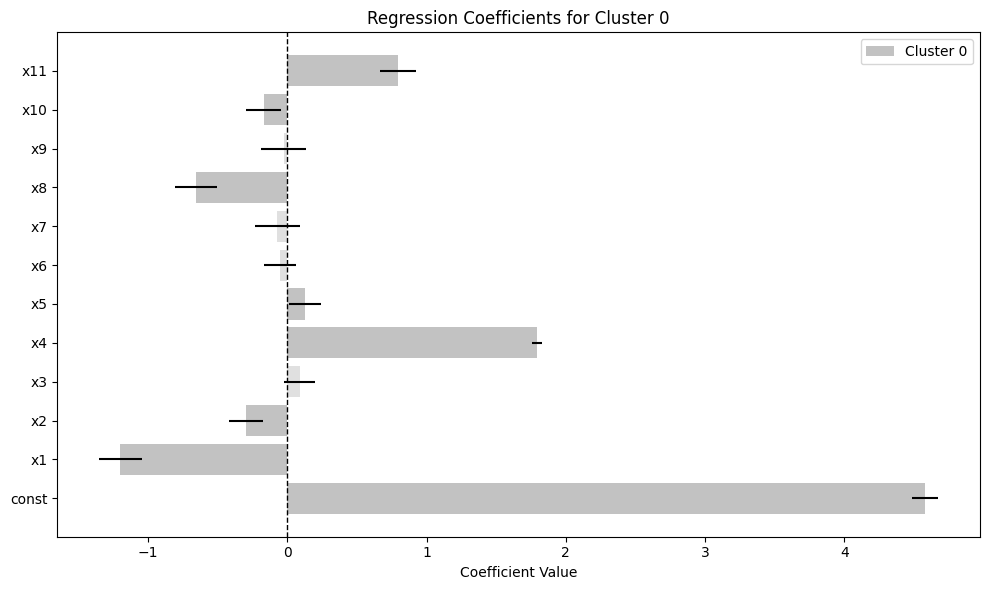

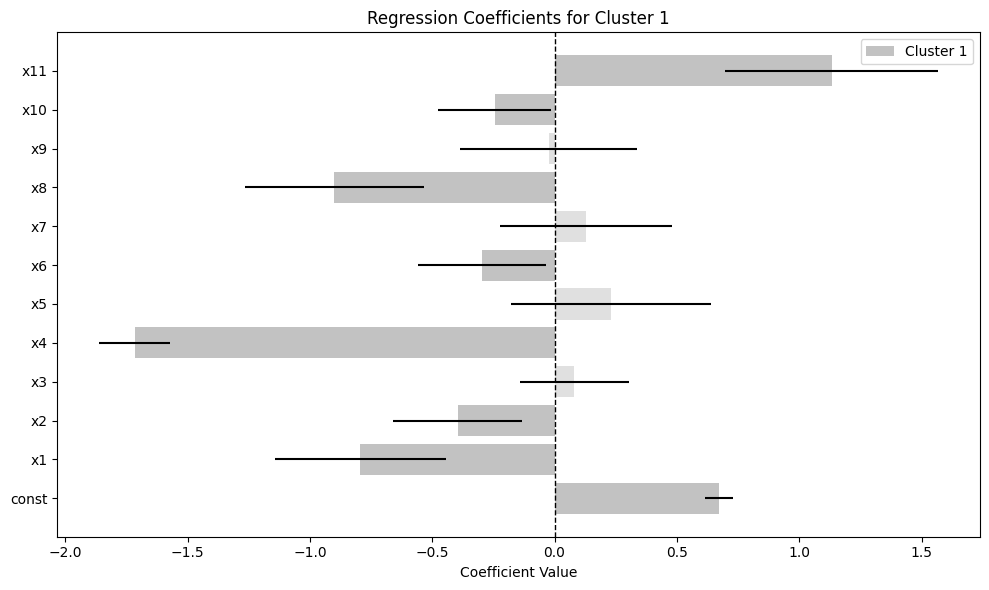

In [635]:
# Extracting the coefficient summary from model_0 (Cluster 0) and model_1 (Cluster 1)
# Using the 'summary2' method from statsmodels to extract detailed information
summary_0 = model_0.summary2().tables[1]  # For Cluster 0
summary_1 = model_1.summary2().tables[1]  # For Cluster 1

# Extract the coefficients, p-values, and confidence intervals from the summary
# For Cluster 0
coef_0 = summary_0['Coef.']
pvalues_0 = summary_0['P>|t|']
ci_0 = summary_0[['[0.025', '0.975]']].values

# For Cluster 1
coef_1 = summary_1['Coef.']
pvalues_1 = summary_1['P>|t|']
ci_1 = summary_1[['[0.025', '0.975]']].values

# Combine all the extracted information into a single DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Variable': summary_0.index,
    'Cluster 0 Coefficient': coef_0,
    'Cluster 1 Coefficient': coef_1,
    'Cluster 0 p-value': pvalues_0,
    'Cluster 1 p-value': pvalues_1,
    'Cluster 0 CI Lower': ci_0[:, 0],
    'Cluster 0 CI Upper': ci_0[:, 1],
    'Cluster 1 CI Lower': ci_1[:, 0],
    'Cluster 1 CI Upper': ci_1[:, 1],
})

# Plot for Cluster 0
fig_0, ax_0 = plt.subplots(figsize=(10, 6))

# Determine significance for Cluster 0
significance_0 = coef_df['Cluster 0 p-value'] < 0.05  # p-value < 0.05 is significant

# Plot coefficients for Cluster 0 with confidence intervals
ax_0.barh(coef_df['Variable'], coef_df['Cluster 0 Coefficient'], 
          color=np.where(significance_0, 'darkgrey', 'lightgrey'), 
          xerr=[coef_df['Cluster 0 Coefficient'] - coef_df['Cluster 0 CI Lower'],
                coef_df['Cluster 0 CI Upper'] - coef_df['Cluster 0 Coefficient']],
          label='Cluster 0', alpha=0.7)

# Adding labels and title for Cluster 0
ax_0.set_xlabel('Coefficient Value')
ax_0.set_title('Regression Coefficients for Cluster 0')
ax_0.axvline(0, color='black', linewidth=1, linestyle='--')  # Vertical line at 0
ax_0.legend()

# Show the Cluster 0 plot
plt.tight_layout()
plt.show()

# Plot for Cluster 1
fig_1, ax_1 = plt.subplots(figsize=(10, 6))

# Determine significance for Cluster 1
significance_1 = coef_df['Cluster 1 p-value'] < 0.05  # p-value < 0.05 is significant

# Plot coefficients for Cluster 1 with confidence intervals
ax_1.barh(coef_df['Variable'], coef_df['Cluster 1 Coefficient'], 
          color=np.where(significance_1, 'darkgrey', 'lightgrey'), 
          xerr=[coef_df['Cluster 1 Coefficient'] - coef_df['Cluster 1 CI Lower'],
                coef_df['Cluster 1 CI Upper'] - coef_df['Cluster 1 Coefficient']],
          label='Cluster 1', alpha=0.7)

# Adding labels and title for Cluster 1
ax_1.set_xlabel('Coefficient Value')
ax_1.set_title('Regression Coefficients for Cluster 1')
ax_1.axvline(0, color='black', linewidth=1, linestyle='--')  # Vertical line at 0
ax_1.legend()

# Show the Cluster 1 plot
plt.tight_layout()
plt.show()


### SEGMENT PROFILLING

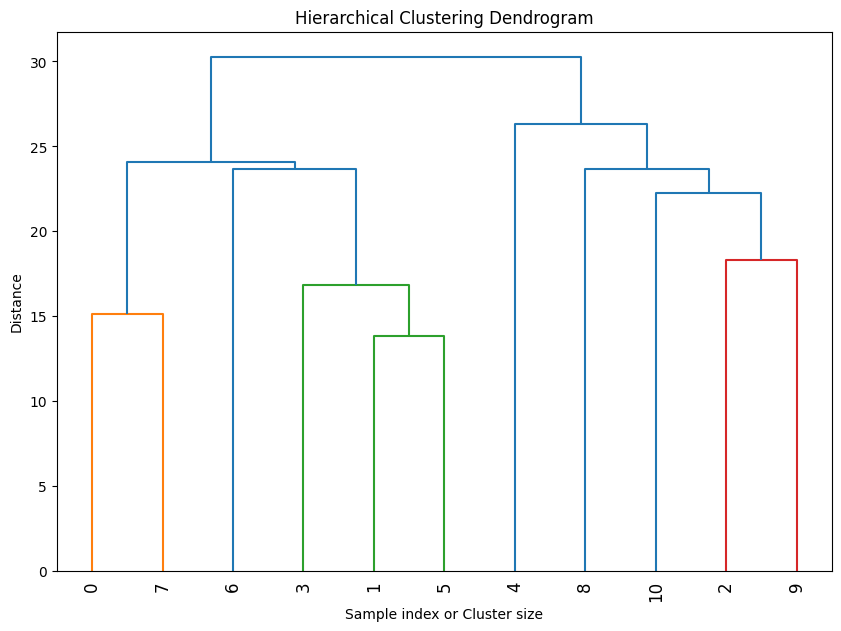

In [676]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Standardize the data
scaler = StandardScaler()
D = np.transpose(MD_x)

# Perform hierarchical clustering
Z = linkage(D, method="average")

# Create the dendrogram with more customization
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode="lastp", p=11, leaf_rotation=90,
           leaf_font_size=12, show_contracted=True, 
           color_threshold=0.7 * max(Z[:, 2]))  # Adjust color threshold for branches

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or Cluster size")
plt.ylabel("Distance")
plt.show()


## Describing Segments

In [681]:
from statsmodels.graphics.mosaicplot import mosaic

In [707]:
mos_tab = pd.crosstab(df['cluster_num'],df['Like'])
mos_tab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,229,160,143
1,152,71,73,0,0,0,0,0,0,0,0
2,0,0,0,59,58,169,0,0,0,0,0
3,0,0,0,0,0,0,152,187,0,0,0


<ggplot: (640 x 480)>


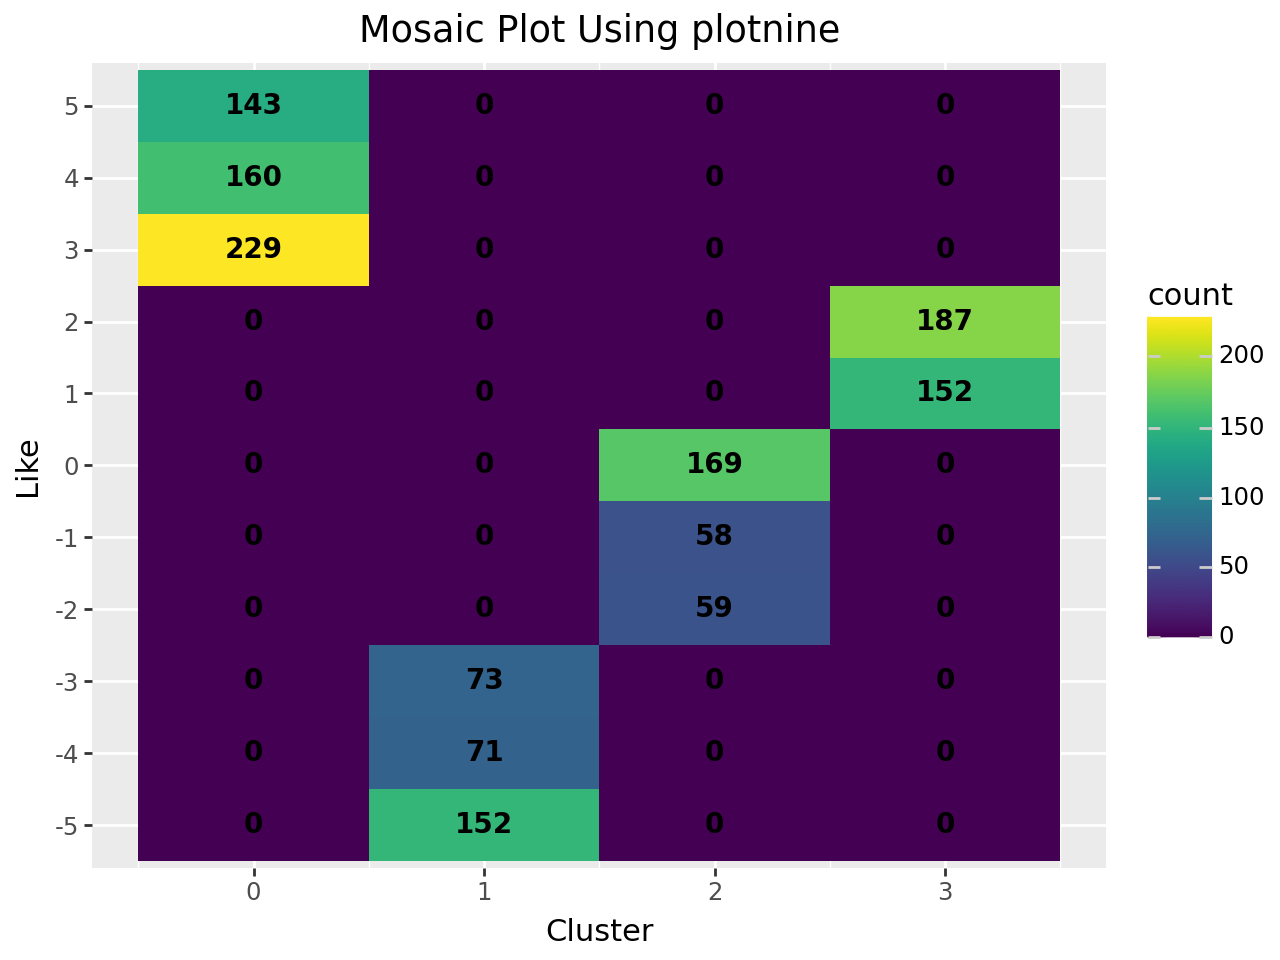

In [733]:
from plotnine import ggplot, aes, geom_tile, facet_wrap, labs, geom_text

# Convert the contingency table to a long format for plotnine
mos_tab_reset = mos_tab.reset_index()
mos_tab_long = pd.melt(mos_tab_reset, id_vars=['cluster_num'], var_name='Like', value_name='count')

# Create the plot
p = (ggplot(mos_tab_long, aes(x='cluster_num', y='Like', fill='count'))
     + geom_tile()
     + geom_text(aes(label='count'), color='black', size=10, fontweight='bold', va='center', ha='center')
     + labs(title='Mosaic Plot Using plotnine', x='Cluster', y='Like'))

print(p)
p.show()

In [723]:
gender_tab = pd.crosstab(df['cluster_num'],df['Gender'])
gender_tab

Gender,Female,Male
cluster_num,,
0,306,226
1,152,144
2,149,137
3,181,158


<ggplot: (640 x 480)>


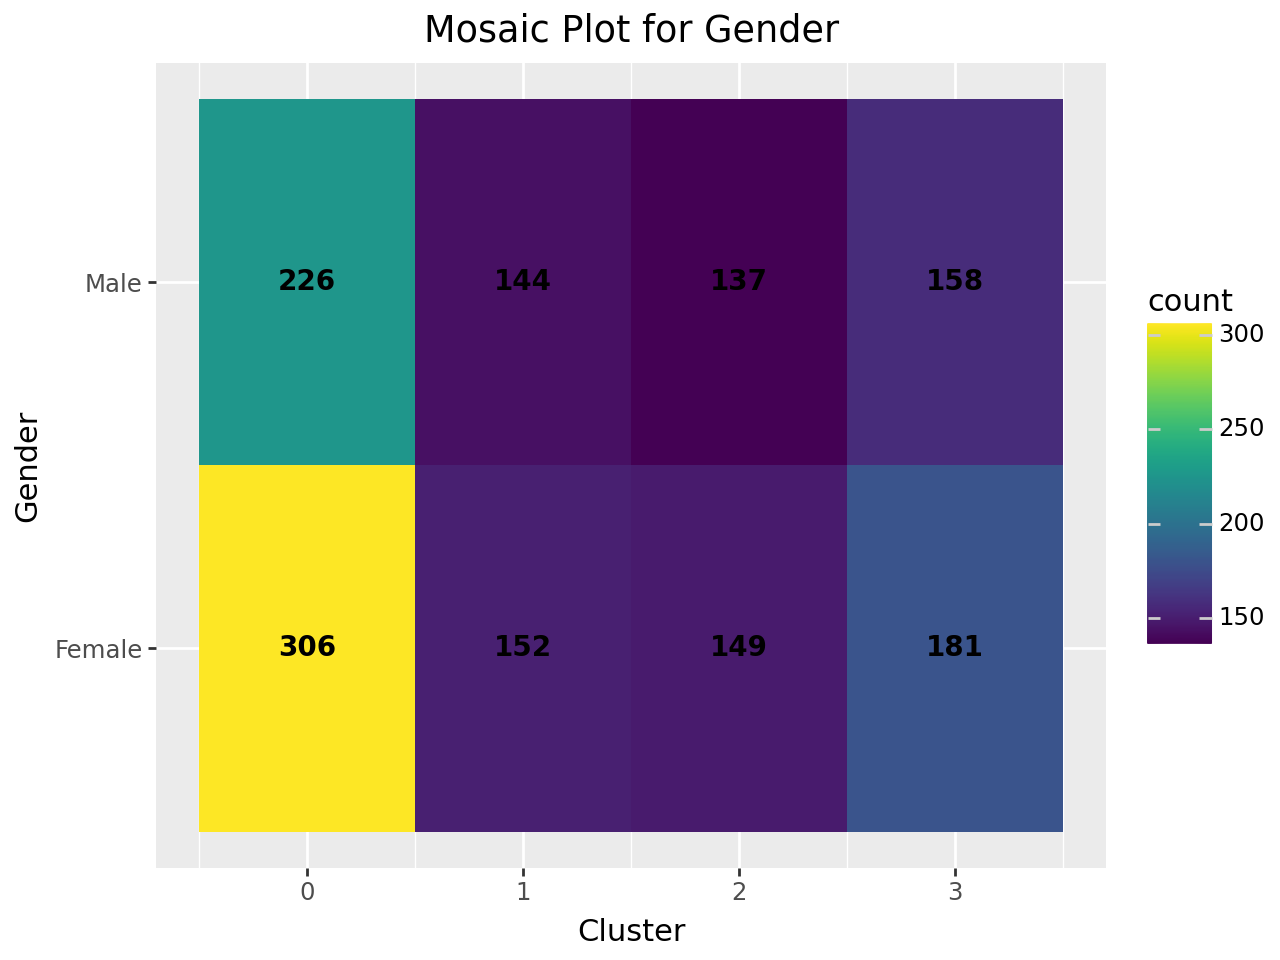

In [731]:
from plotnine import ggplot, aes, geom_tile, facet_wrap, labs, geom_text

# Convert the contingency table to a long format for plotnine
gender_tab_reset = gender_tab.reset_index()
gender_tab_long = pd.melt(gender_tab_reset, id_vars=['cluster_num'], var_name='Gender', value_name='count')

# Create the plot
p2 = (ggplot(gender_tab_long, aes(x='cluster_num', y='Gender', fill='count'))
     + geom_tile()
     + geom_text(aes(label='count'), color='black', size=10, fontweight='bold', va='center', ha='center')
     + labs(title='Mosaic Plot for Gender', x='Cluster', y='Gender'))

print(p2)
p2.show()

## Select Target Segment

In [738]:
from sklearn.preprocessing import LabelEncoder
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.701128
1,1,2.945946
2,2,2.440559
3,3,2.436578


In [740]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,8.838346
1,1,0.733108
2,2,4.384615
3,3,6.551622


In [742]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.424812
1,1,0.486486
2,2,0.479021
3,3,0.466077


In [744]:
target = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
target

,cluster_num,Gender,Like,VisitFrequency
0,0,0.424812,8.838346,2.701128
1,1,0.486486,0.733108,2.945946
2,2,0.479021,4.384615,2.440559
3,3,0.466077,6.551622,2.436578


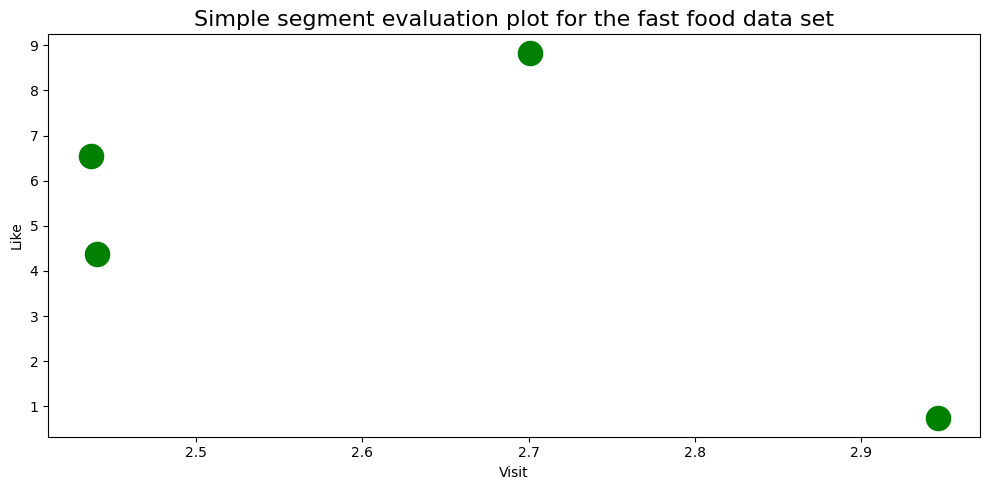

In [754]:
#Target segments
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=target,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()

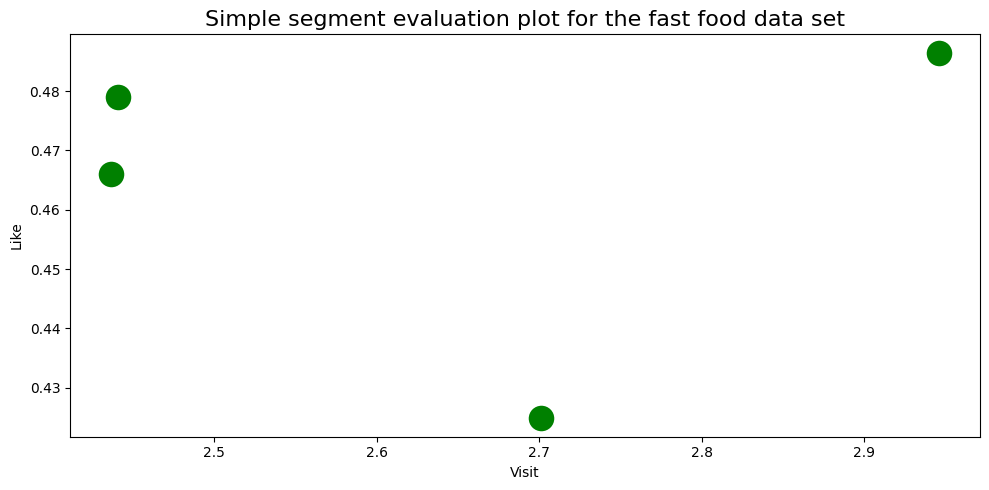

In [756]:
#Target segments
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Gender",data=target,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()

#### Step 9: Customising the Marketing Mix
In Step 9, McDonald’s focuses on tailoring the marketing mix for each segment. For example, if Segment 3 consists of young customers who enjoy McDonald’s but find it expensive, McDonald’s could introduce a MCSUPERBUDGET line to cater specifically to their price sensitivity (4Ps: Price). This approach would aim to build customer loyalty, allowing these young customers to transition to the regular product range as their financial situation improves. To avoid cannibalisation, the MCSUPERBUDGET line should offer distinctly different product features (4Ps: Product). Additionally, McDonald’s must identify the communication channels most popular with this segment to promote the new line effectively (4Ps: Promotion). Distribution would remain the same, as all products are sold in McDonald’s outlets, but a MCSUPERBUDGET lane could be introduced to differentiate the service experience (4Ps: Place).

#### Step 10: Evaluation and Monitoring
Once the market segmentation strategy is implemented, McDonald’s must continuously evaluate and monitor its effectiveness. For instance, if members of Segment 3 start earning more money, the MCSUPERBUDGET line might no longer meet their needs. Market changes, such as new competitors or evolving customer preferences, must be carefully tracked. Continuous monitoring ensures that McDonald’s can adapt its strategy in response to internal and external changes, maintaining relevance in the marketplace.